# Notebook that has function to send email to given email id

In [24]:
import os, sys
import boto3
import import_ipynb


from notebook_1_Abhinav_kohar import * # include current dir in sys path for this to work
# import sys, os
# sys.path.append(os.getcwd())


In [25]:
# !pip install boto3
# !pip install import-ipynb

## Prerequisites
* Python3
* Boto3: Boto3 can be installed using pip: pip install boto3
* AWS Credentials: If you haven’t setup AWS credentials before, this resource from AWS is helpful.
** https://docs.aws.amazon.com/sdk-for-java/v1/developer-guide/setup-credentials.html

## Verify the email to send from 
#### You can use the function below

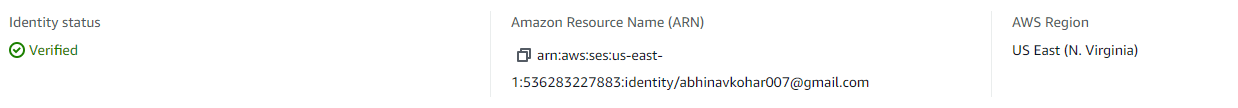

In [26]:
class EmailClient:
    ACCESS_ID = os.getenv("AWSAccessKeyId")
    ACCESS_KEY = os.getenv("AWSSecretKey")
    ses = boto3.client('ses', region_name='us-east-2',
                       aws_access_key_id=ACCESS_ID,
                       aws_secret_access_key=ACCESS_KEY)
    EMAIL_SOURCE = os.getenv('EMAIL_SOURCE')
    DEFAULT_RECIPIENT = EMAIL_SOURCE
    AWS_SES_EMAIL_TEMPLATE = 'WeatherReminderTemplate'

    @classmethod
    def verify_email_id(cls):
        response = cls.ses.verify_email_identity(
            EmailAddress="abhinavkohar007@gmail.com"
        )
        print(response)

    @classmethod
    def send_forecast(cls, template_data, recipient=DEFAULT_RECIPIENT):
        # print("-------------------------------------\n",template_data)
        response = cls.ses.send_templated_email(
            Source=cls.EMAIL_SOURCE,
            Destination={
                'ToAddresses': [
                    recipient,
                ],
            },
            Template=cls.AWS_SES_EMAIL_TEMPLATE,
            TemplateData=template_data
        ) 

        print(response)



In [27]:
forecasts = WeatherClient.get_seven_forecast_formatted()

EmailClient.send_forecast(forecasts)

https://api.openweathermap.org/data/2.5/onecall?units=imperial&lat=29.76&lon=95.36&exclude=[current,minutely,hourly,alerts]&appid=3088959d2c8f3842007b54b8aee15d30
{'current': {'clouds': 100,
             'dew_point': 28.36,
             'dt': 1649566924,
             'feels_like': 41.54,
             'humidity': 55,
             'pressure': 1014,
             'sunrise': 1649546270,
             'sunset': 1649592101,
             'temp': 42.93,
             'uvi': 10.08,
             'visibility': 10000,
             'weather': [{'description': 'overcast clouds',
                          'icon': '04d',
                          'id': 804,
                          'main': 'Clouds'}],
             'wind_deg': 175,
             'wind_gust': 5.01,
             'wind_speed': 3.13},
 'daily': [{'clouds': 100,
            'dew_point': 28.36,
            'dt': 1649566800,
            'feels_like': {'day': 41.54,
                           'eve': 33.35,
                           'morn': 29.39

{'MessageId': '010f018011da0767-f1ad0cba-e9c6-4577-a6bd-f667edd2b861-000000', 'ResponseMetadata': {'RequestId': '7b213199-1a82-48b8-990e-fbd7733e9b38', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Sun, 10 Apr 2022 05:02:23 GMT', 'content-type': 'text/xml', 'content-length': '362', 'connection': 'keep-alive', 'x-amzn-requestid': '7b213199-1a82-48b8-990e-fbd7733e9b38'}, 'RetryAttempts': 0}}
